# Potato Disease Classification

## requied libreries

In [2]:
from tensorflow import keras
import tensorflow as tf 
import os,splitfolders
import matplotlib.pyplot as plt
import numpy as np

## Train and Val Path

In [3]:
train_dir = '../train_val_test_split_data/train/'
val_dir = '../train_val_test_split_data/val/'

## Data Augmentation from local dir and making <code>tf.tensor</code>

In [5]:
image_size = (256,256)
# Image data augmentation for training set
image_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    
)

# # Image data augmentation for validation and test sets (only rescaling)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# # Create generators
train = image_aug.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

val = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=12,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False  # No need to shuffle for validation
)

Found 1721 images belonging to 3 classes.
Found 215 images belonging to 3 classes.


## ANN

In [7]:


model = keras.Sequential(
    [
        keras.layers.Input(shape=(256,256,3)),
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(3,activation='softmax')
    ]
)

model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

## Training the model

In [ ]:
epochs = 50
batch_size = 32
verbose = 1
history = model.fit(train,
          validation_data=val,
          epochs=epochs,
          batch_size=batch_size,
          verbose=verbose)

## Save weights

In [ ]:
model.save('../Weights/001.h5')

## Prediction on test data

Found 216 images belonging to 3 classes.
1/1 [==============================] - 0s 147ms/step


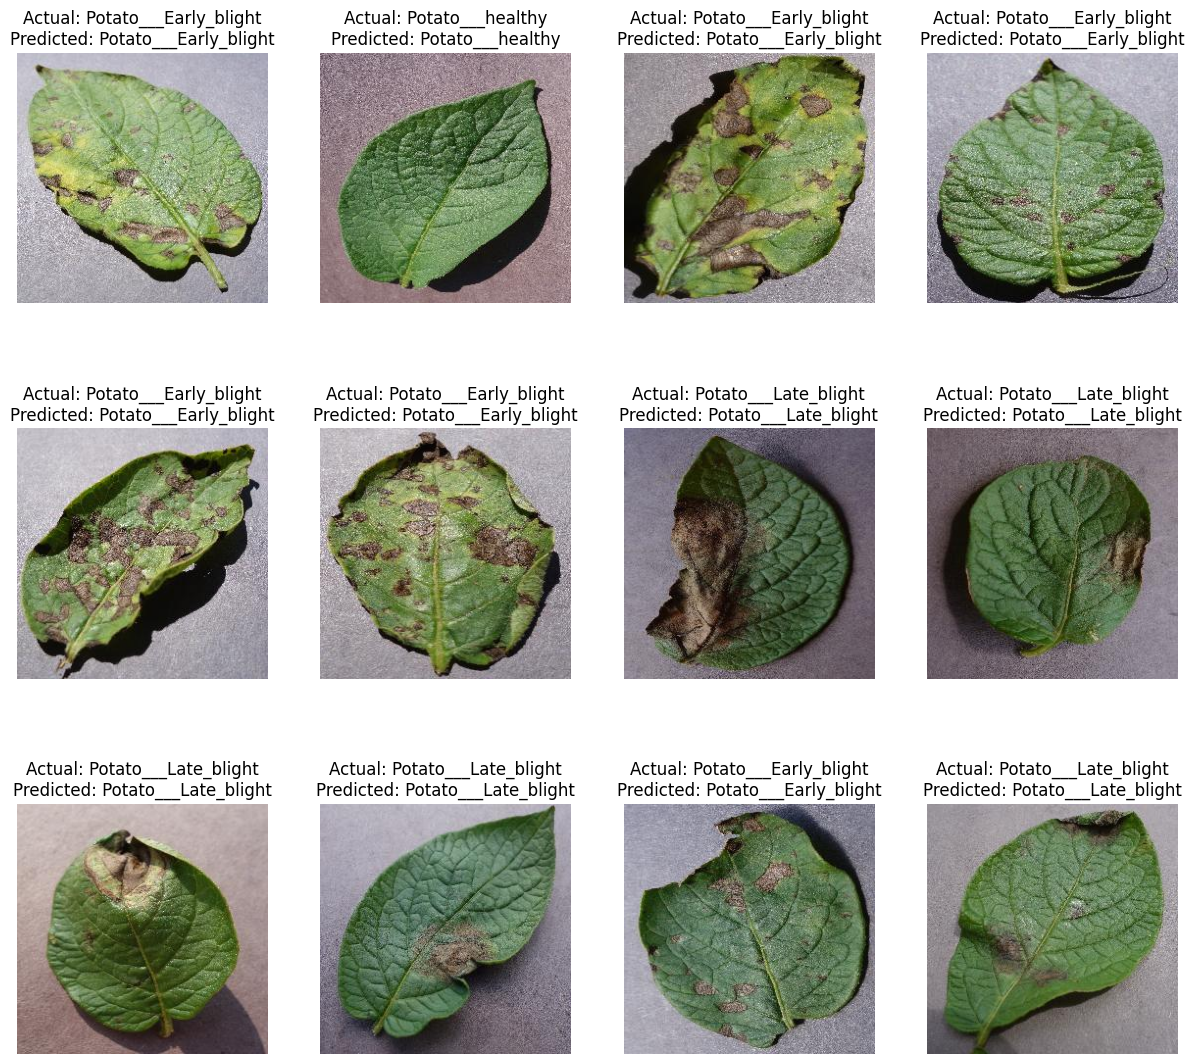

In [12]:
new = tf.keras.models.load_model('../Weights/001.h5')
tensor = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_imgs = tensor.flow_from_directory(
    '../train_val_test_split_data/test/',
    batch_size=12
)
images,labels = next(test_imgs) # take 1st batch of images 
predictions = new.predict(images)
predicted_class_indices = np.argmax(predictions, axis=1)
class_names = list(test_imgs.class_indices.keys()) # actual labels 
predicted_class_names = [class_names[idx] for idx in predicted_class_indices]

# Create a subplot grid
fig, axes = plt.subplots(3, 4, figsize=(15, 13))
fig.subplots_adjust(hspace=0.5)

# Plot each image with its predicted class
for i, (img, label, predicted_class) in enumerate(zip(images, labels, predicted_class_names)):
    ax = axes[i // 4, i % 4]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Actual: {class_names[np.argmax(label)]}\nPredicted: {predicted_class}')

plt.show()

## model perfomance history

In [ ]:
epochs = range(history.params['epochs'])
params = history.history
params.values()

plt.figure(figsize=(10,8))
for i, (data, label) in enumerate(zip(list(params.values()), list(params.keys()))):
    plt.subplot(2, 2, i + 1)
    plt.plot(epochs, data)
    plt.title('epoch  vs '+label)

plt.tight_layout()
plt.show()


In [13]:
new.evaluate(test_imgs)

18/18 [==============================] - 1s 66ms/step - loss: 0.0199 - accuracy: 1.0000


[0.0198572538793087, 1.0]